<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [85]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [86]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [88]:
df.shape

(301, 9)

In [89]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


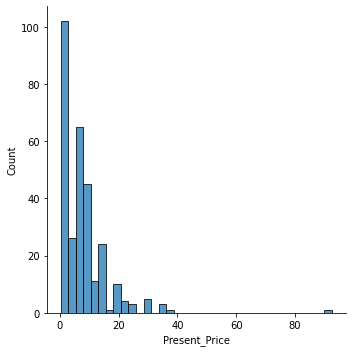

In [90]:
sns.displot(df.Present_Price)

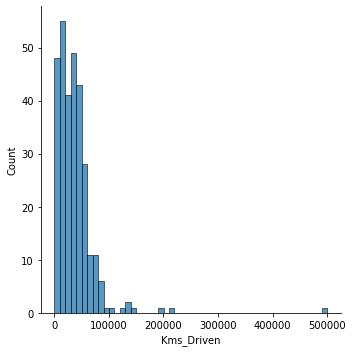

In [91]:
sns.displot(df.Kms_Driven)

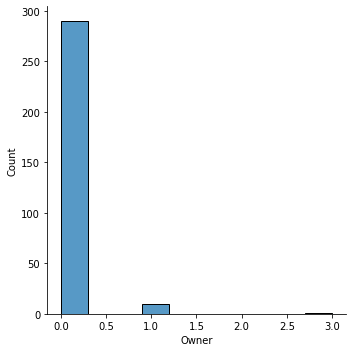

In [92]:
sns.displot(df.Owner)

In [93]:
df.Year.value_counts().sort_index()

2003     2
2004     1
2005     4
2006     4
2007     2
2008     7
2009     6
2010    15
2011    19
2012    23
2013    33
2014    38
2015    61
2016    50
2017    35
2018     1
Name: Year, dtype: int64

In [105]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [106]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [107]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [108]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [109]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [ ]:
sns.pairplot(df)

In [110]:
df['Age'] = 2018 - df.Year

In [111]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


In [112]:
df.drop(['Car_Name','Year'],axis=1,inplace=True)

In [113]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,4
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,2
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,3
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,9
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,1


<AxesSubplot:>

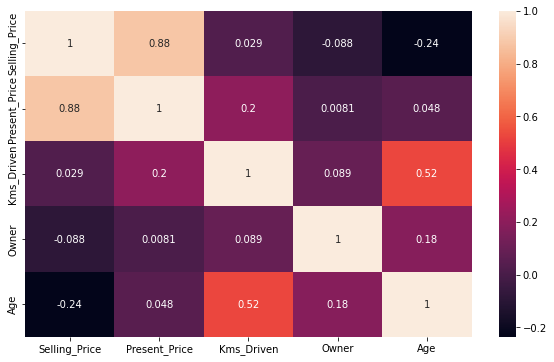

In [114]:
sns.heatmap(df.corr(),annot=True)

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [115]:
df = pd.get_dummies(df,drop_first='True')

In [121]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,4,0,1,0,1
1,4.75,9.54,43000,0,5,1,0,0,1
2,7.25,9.85,6900,0,1,0,1,0,1
3,2.85,4.15,5200,0,7,0,1,0,1
4,4.60,6.87,42450,0,4,1,0,0,1


<AxesSubplot:>

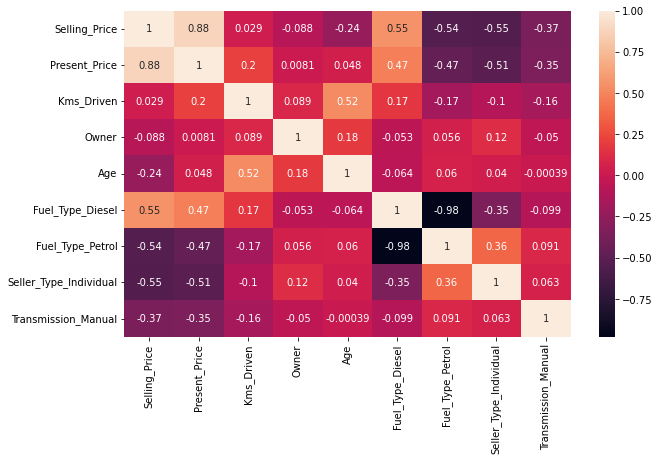

In [120]:
sns.heatmap(df.corr(),annot=True)

In [163]:
#Introduction of metrics result function
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

### Features and target variable

In [127]:
X = df.drop(["Selling_Price"],axis=1)
y = df["Selling_Price"]

### Splitting data into training and testing

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=45)

In [143]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


##  Model Building (Linear Regression)

In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
print(f'Score of train data : {lm.score(X_train_scaled, y_train)}')
print(f'Score of test data  : {lm.score(X_test_scaled, y_test)}')

Score of train data : 0.8786499229158986
Score of test data  : 0.8945867179751016


# Interpret the model

In [182]:
coef = pd.DataFrame(lm.coef_,index=X_train.columns,columns=['Coef.'])
coef

,Coef.
Present_Price,39.537605
Kms_Driven,-3.711899
Owner,-2.966482
Age,-6.084328
Fuel_Type_Diesel,2.433861
Fuel_Type_Petrol,0.503556
Seller_Type_Individual,-0.986282
Transmission_Manual,-1.768593


Text(0, 0.5, 'Predictions Y')

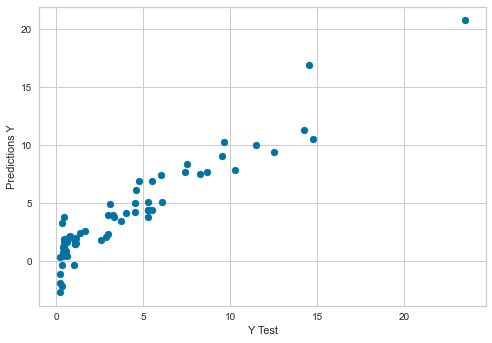

In [167]:
predictions = lm.predict(X_test_scaled)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions Y')

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

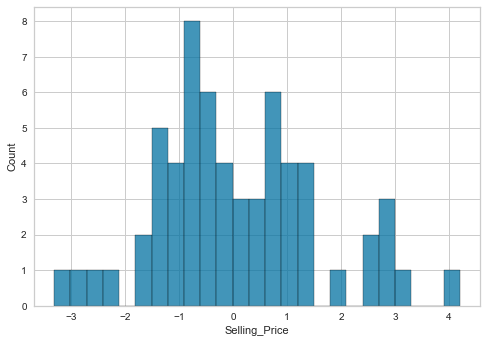

In [161]:
residual = y_test - predictions
sns.histplot(residual,bins=25) #Distribution of the residuals

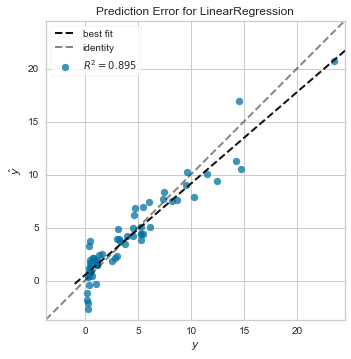

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [147]:
#Visual of prediction

from yellowbrick.regressor import PredictionError
visual = PredictionError(lm)
visual.fit(X_train_scaled, y_train)
visual.score(X_test_scaled, y_test)
visual.show()

# Model Evaluation

In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [ ]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [170]:
train_val(y_train,y_train_pred,y_test,predictions,'Linear')

,Linear_train,Linear_test
R2,0.818456,0.894587
mae,1.453443,1.202385
mse,4.847541,2.300674
rmse,2.201713,1.516797


# Regularization

## Ridge

In [180]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1, random_state=45)

ridge_model.fit(X_train_scaled, y_train)

y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.818456,0.842107
mae,1.453443,1.225227
mse,4.847541,3.446065
rmse,2.201713,1.856358


In [184]:
ridge_model.alpha

1

In [183]:
rm_coef = ridge_model.coef_

rm_coef = pd.DataFrame(ridge_model.coef_,index=X_train.columns,columns=['Ridge_Coef.'])
rm_coef

,Ridge_Coef.
Present_Price,22.510353
Kms_Driven,-2.248107
Owner,-1.319053
Age,-5.194171
Fuel_Type_Diesel,2.753299
Fuel_Type_Petrol,-0.371492
Seller_Type_Individual,-2.275044
Transmission_Manual,-2.951441


## Lasso

In [187]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1, random_state=45)

lasso_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

train_val(y_train, y_train_pred, y_test, y_pred, "Lasso")

,lasso_train,lasso_test
R2,0.115912,0.164734
mae,3.111441,3.223116
mse,23.606661,18.229907
rmse,4.858669,4.269649


In [188]:
lasso_model.alpha

1

## Elastic-Net 

In [191]:
from sklearn.linear_model import ElasticNet

elastic_model = Lasso(alpha=1, random_state=45)

elastic_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

train_val(y_train, y_train_pred, y_test, y_pred, "Elastic-net")

,Elastic-net_train,Elastic-net_test
R2,0.115912,0.164734
mae,3.111441,3.223116
mse,23.606661,18.229907
rmse,4.858669,4.269649
